# Compile the main simulator code using cython 

In [1]:
!python setup.py build_ext --inplace

running build_ext
running build_ext


# Import all the relevant files 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import importlib
import seaborn as sns

In [74]:
#Importing scripts:

#Import relevant frames:
import cbgt as cbgt
import pipeline_creation as pl_creat

#Import plotting functions:
import plotting_functions as plt_func
import plotting_helper_functions as plt_help
import postprocessing_helpers as post_help

importlib.reload(plt_help)
importlib.reload(plt_func)
importlib.reload(post_help)

<module 'postprocessing_helpers' from '/home/jyotika/Work/CBGTPy_release/CBGTPy/postprocessing_helpers.py'>

# Choose the experiment and create the main pipeline

In [5]:
#Choose the experiment
experiment_choice = 'stop-signal'
number_of_choices = 1

#Call choose_pipeline with the pipeline object
pl_creat.choose_pipeline(experiment_choice)

#Create the main pipeline
pl = pl_creat.create_main_pipeline(runloop=True)

#Define how many simulations to run 
#Each simulation is executed as a separate thread
num_sims = 1
num_cores = 7

#Set a seed
seed = np.random.randint(0,99999999,1)[0]
print(seed)

in choose pipeline
in reward pipeline
75434668


In [6]:
#Define the data and figure directory

data_dir = "./Data/"
figure_dir = "./Figures/"

# Running the pipeline

### Define configuration parameter

In [7]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 

configuration = {
    'experimentchoice': experiment_choice,
    'inter_trial_interval': None,
    'thalamic_threshold': 30.,
    'movement_time': ['mean', 250], #['constant', 300], #default sampled from N(250,1.5), ["constant",250], ["mean",250]
    'choice_timeout': 300, #default 1000
    
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame(['left'], columns=['action']), #action channels related parameters (init_params.py)
    'number_of_choices':number_of_choices,
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df_set': pd.DataFrame([[0.5]],columns=["left"]), #pd.DataFrame([[0.3,0.7]],columns=['left','right']), #initialized Q-values df (qvalues.py)  
    'n_trials': 3, #number of trials (generateepochs.py)
    'volatility': [None,"exact"], #frequency of changepoints (generateepochs.py)
    'conflict': (1.0), #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 1.05, # amplitude of the cortical input over base line #0.85
    'sustainedfraction': 0.75,
    
    #Stop 1
    'stop_signal_present': [True,True],
    'stop_signal_probability': [1., 1.],  #[[1,3],[1,2]], #probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude': [0.4, 0.4], # amplitude of the stop signal over base line
    'stop_signal_onset': [30.,60.], #in ms #antes 200
    'stop_signal_duration' : [200.,200.], 
    'stop_signal_channel': ["all","all"], #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signa
    'stop_signal_population':["STN","GPeA"],
    
    #Stop 2
#     'stop_2_signal_present': True,
#     'stop_2_signal_probability': 1., #probability of trials that will get the stop signal / list of trial numbers
#     'stop_2_signal_amplitude': 0.4, # amplitude of the stop signal over base line
#     'stop_2_signal_onset': 60., #in ms #antes 200
#     'stop_2_signal_duration' : 150.,
#     'stop_2_signal_channel': "all", #"all" (all channels are given the stop signal) 
#                                 #/"any" (channel given the stop signal is chosen randomly)
#                                 # [list of channels] == subset of channels given the stop signal
#     'stop_2_signal_population':["GPeA"],
    
    
    'decision_channel' : 'all', #'all'(all channels)
                              # '0' : left channel considered 
                              # '1' : right channel considered
    
    'record_variables':["stop_input"],
    
    
    #Opto
    'opt_signal_present': False,
    'opt_signal_probability': 1., #[0,1,2,3,4], # probability of trials that will get the optogenetic signal / list of trial numbers
    'opt_signal_amplitude': .7, # ampitude of the stop signal over base line
    'opt_signal_onset': 30., # in ms
    'opt_signal_duration': 150.,
    'opt_signal_channel': "all", # "all" (all channels are given the stop signal) 
    'opt_signal_population':["D2STR"],
}

### Run the simulation

In [8]:
results = cbgt.ExecutionManager(cores=7).run([pl]*num_sims,[configuration]*num_sims)  

SpawnThreadManagers <backend.Pipeline object at 0x7f81d49a2700>
(worker pid=30087) in choose pipeline
(worker pid=30087) conflict 1.0
(worker pid=30087) conflict 1.0
(worker pid=30087) sum 1.0
(worker pid=30087) n_prob_trials [3]
(worker pid=30087) calc_rew        left
(worker pid=30087) 0  1.095009
(worker pid=30087) 1  0.984864
(worker pid=30087) 2  0.989678
(worker pid=30087) reward_list        left
(worker pid=30087) 0  1.095009
(worker pid=30087) 1  0.984864
(worker pid=30087) 2  0.989678
(worker pid=30087) in choose pipeline
(worker pid=30087) conflict 1.0
(worker pid=30087) conflict 1.0
(worker pid=30087) sum 1.0
(worker pid=30087) n_prob_trials [3]
(worker pid=30087) calc_rew        left
(worker pid=30087) 0  1.095009
(worker pid=30087) 1  0.984864
(worker pid=30087) 2  0.989678
(worker pid=30087) reward_list        left
(worker pid=30087) 0  1.095009
(worker pid=30087) 1  0.984864
(worker pid=30087) 2  0.989678
SpawnThreadManagers <backend.Pipeline object at 0x7f81d49a2b50>
Sp

(worker pid=30087) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:105: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=30087)   Q_df = Q_df.append(
(worker pid=30087) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=30087)   Q_df = Q_df.append(
(worker pid=30087) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:105: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=30087)   Q_df = Q_df.append(
(worker pid=30087) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=30087)   Q_df = Q_df.append(


(worker pid=30087) agent.stop_popids [array([1]), array([3])]
(worker pid=30087) agent.stop_popids [array([1]), array([3])]
(worker pid=30087) stop stim started
(worker pid=30087) stop stim started
(worker pid=30087) stop stim started
(worker pid=30087) stop stim started
(worker pid=30087) gateFRs [21.11111111]
(worker pid=30087) thresholds_crossed []
(worker pid=30087) gateFRs [21.11111111]
(worker pid=30087) thresholds_crossed []
(worker pid=30087) trial_num 0
(worker pid=30087)   action
(worker pid=30087) 0   left
(worker pid=30087) chosen_action: stop
(worker pid=30087) trial_num 0
(worker pid=30087)   action
(worker pid=30087) 0   left
(worker pid=30087) chosen_action: stop
(worker pid=30087) stop stim started
(worker pid=30087) stop stim started
(worker pid=30087) stop stim started
(worker pid=30087) stop stim started
(worker pid=30087) gateFRs [26.44444444]
(worker pid=30087) thresholds_crossed []
(worker pid=30087) gateFRs [26.44444444]
(worker pid=30087) thresholds_crossed []


### Results

In [9]:
#List all the agent variables accessible
results[0].keys()

dict_keys(['experimentchoice', 'inter_trial_interval', 'thalamic_threshold', 'movement_time', 'choice_timeout', 'params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'number_of_choices', 'newpathways', 'Q_support_params', 'Q_df_set', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'sustainedfraction', 'stop_signal_present', 'stop_signal_probability', 'stop_signal_amplitude', 'stop_signal_onset', 'stop_signal_duration', 'stop_signal_channel', 'stop_signal_population', 'decision_channel', 'record_variables', 'opt_signal_present', 'opt_signal_probability', 'opt_signal_amplitude', 'opt_signal_onset', 'opt_signal_duration', 'opt_signal_channel', 'opt_signal_population', 'par', 'popconstruct', 'interface', 'gen_stop', 'gen_stop_2', 'actionchannels', 'trial_wise_movement_times', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'block', 'trial_num', 'chosen_action', 'celldefaults', 'popspecific', 'receptordefaults', 'basestim

In [11]:
results[0]['stop_list_trials_list']

[array([0, 2, 1]), array([0, 2, 1])]

In [12]:
results[0]['meaneff_GABA']

,GPi,STN,GPeP,GPeA,D1STR,D2STR,Cx,Th,FSI,CxI
GPi,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.3315`,0.0`,0.0`
STN,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
GPeP,0.058`,0.37`,0.9`,0.3`,0.0`,0.0`,0.0`,0.0`,0.2`,0.0`
GPeA,0.0`,0.0`,0.0`,0.3`,0.32`,0.12`,0.0`,0.0`,0.02`,0.0`
D1STR,1.8`,0.0`,0.0`,0.054`,0.28`,0.28`,0.0`,0.0`,0.0`,0.0`
D2STR,0.0`,0.0`,4.07`,0.61`,0.28`,0.28`,0.0`,0.0`,0.0`,0.0`
Cx,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
Th,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
FSI,0.0`,0.0`,0.0`,0.0`,1.25`,1.15`,0.0`,0.0`,2.7`,0.0`
CxI,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,1.05`,0.0`,0.0`,1.075`


In [13]:
results[0]['stop_signal_amplitude']

[0.4, 0.4]

In [14]:
experiment_choice

'stop-signal'

In [15]:
#Extract all the relevant dataframes
firing_rates, rt_dist = plt_help.extract_relevant_frames(results,seed,experiment_choice)

/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:217: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rt_distribution = rt_distribution.append(rt)


In [16]:
results[0]['popfreqs']

,GPi_left,STN_left,GPeP_left,GPeA_left,D1STR_left,D2STR_left,Cx_left,Th_left,FSI_common,CxI_common,Time (ms)
0,75.555556,24.311111,52.976190,5.701754,4.222222,3.777778,0.000000,5.333333,7.333333,0.985663,0
1,75.111111,24.333333,52.738095,5.701754,4.222222,3.777778,0.000000,5.333333,7.333333,0.985663,1
2,74.000000,24.488889,53.125000,5.877193,4.222222,3.555556,0.000000,4.888889,7.555556,0.896057,2
3,73.333333,24.355556,52.886905,5.877193,4.000000,3.555556,0.000000,5.333333,7.111111,0.896057,3
4,73.333333,24.311111,53.154762,5.789474,4.000000,3.555556,0.000000,5.333333,7.111111,0.806452,4
...,...,...,...,...,...,...,...,...,...,...,...
3460,79.555556,25.333333,52.470238,7.280702,3.333333,5.777778,3.349673,5.111111,7.555556,2.240143,3460
3461,80.444444,25.422222,52.619048,7.368421,3.333333,5.555556,3.513072,5.111111,7.777778,2.329749,3461
3462,81.555556,25.244444,52.708333,7.105263,3.333333,5.333333,3.513072,5.111111,8.000000,2.508961,3462
3463,82.222222,25.244444,53.184524,7.105263,3.333333,4.888889,3.758170,5.333333,8.444444,2.598566,3463


In [17]:
#Firing rates  
firing_rates[0]

,Time (ms),variable,firing_rate,nuclei,channel,seed
0,0,GPi_left,75.555556,GPi,left,75434668_0
1,1,GPi_left,75.111111,GPi,left,75434668_0
2,2,GPi_left,74.000000,GPi,left,75434668_0
3,3,GPi_left,73.333333,GPi,left,75434668_0
4,4,GPi_left,73.333333,GPi,left,75434668_0
...,...,...,...,...,...,...
34645,3460,CxI_common,2.240143,CxI,common,75434668_0
34646,3461,CxI_common,2.329749,CxI,common,75434668_0
34647,3462,CxI_common,2.508961,CxI,common,75434668_0
34648,3463,CxI_common,2.598566,CxI,common,75434668_0


In [43]:
recorded_variables = post_help.extract_recording_variables(results,results[0]['record_variables'],seed)

In [44]:
recorded_variables['stop_input']#.melt(id_vars='Time(ms)')

,index,value,nuclei,seed,Time(ms)
0,0,4.45,STN,75434668_0,0
1,1,4.45,STN,75434668_0,1
2,2,4.45,STN,75434668_0,2
3,3,4.45,STN,75434668_0,3
4,4,4.45,STN,75434668_0,4
...,...,...,...,...,...
6923,3459,2.50,GPeA,75434668_0,3459
6924,3460,2.50,GPeA,75434668_0,3460
6925,3461,2.50,GPeA,75434668_0,3461
6926,3462,2.50,GPeA,75434668_0,3462


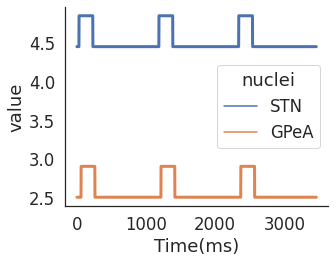

In [47]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
sns.set(style="white", font_scale=1.5)
sns.lineplot(x="Time(ms)",y="value",data=recorded_variables['stop_input'],hue='nuclei',lw=3.0,ax=ax)
# ax.set_ylabel("STN",fontweight='bold')
# ax.legend_.remove()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
plt.tight_layout()
fig.savefig(figure_dir+'stop_input.png')

In [49]:
#Extract the data tables from the agent
datatables = cbgt.collateVariable(results,'datatables')
datatables[0]

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward
0,stop,0,301,301,555,555,left,0
1,stop,1156,1457,301,553,1709,left,0
2,stop,2310,2611,301,553,2863,left,0


In [50]:
#Save the selected variables of results in the data_dir specified
cbgt.saveResults(results,data_dir+'network_data_'+str(seed)+'.pickle',['popfreqs','popdata','datatables'])

In [51]:
results[0].keys()

dict_keys(['experimentchoice', 'inter_trial_interval', 'thalamic_threshold', 'movement_time', 'choice_timeout', 'params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'number_of_choices', 'newpathways', 'Q_support_params', 'Q_df_set', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'sustainedfraction', 'stop_signal_present', 'stop_signal_probability', 'stop_signal_amplitude', 'stop_signal_onset', 'stop_signal_duration', 'stop_signal_channel', 'stop_signal_population', 'decision_channel', 'record_variables', 'opt_signal_present', 'opt_signal_probability', 'opt_signal_amplitude', 'opt_signal_onset', 'opt_signal_duration', 'opt_signal_channel', 'opt_signal_population', 'par', 'popconstruct', 'interface', 'gen_stop', 'gen_stop_2', 'actionchannels', 'trial_wise_movement_times', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'block', 'trial_num', 'chosen_action', 'celldefaults', 'popspecific', 'receptordefaults', 'basestim

In [62]:
results[0]['stop_signal_present']

[True, True]

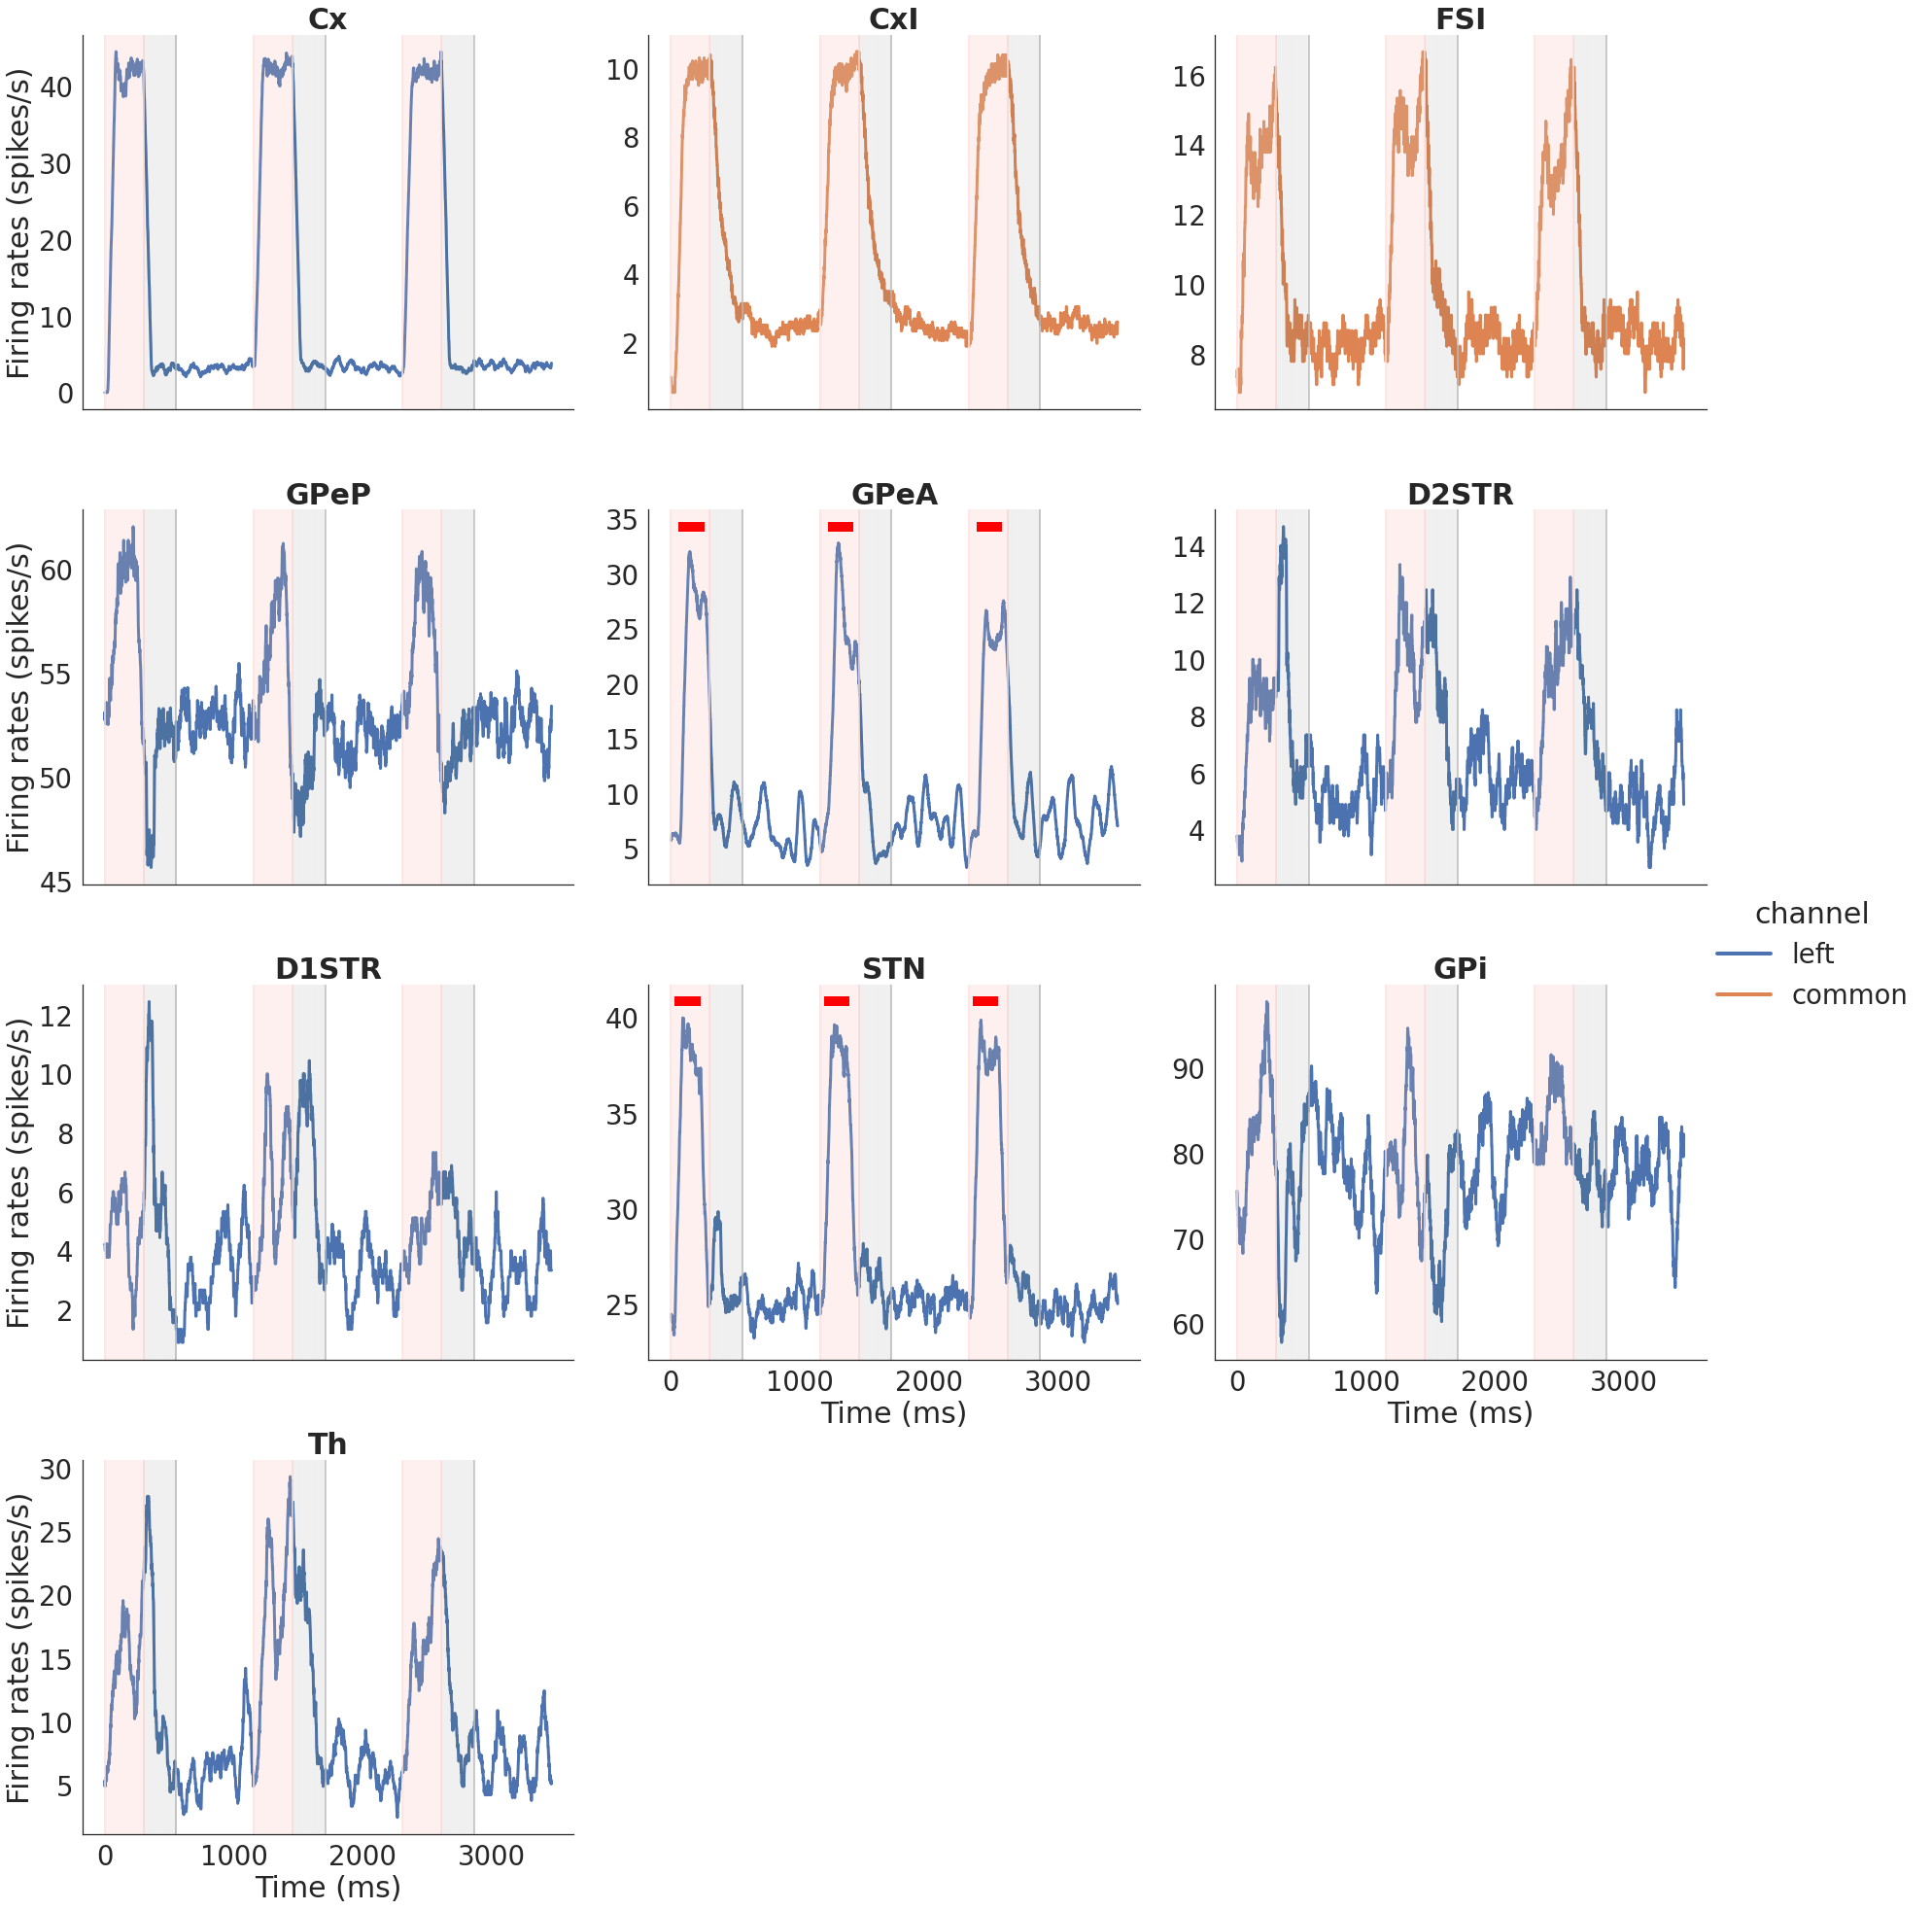

In [75]:
# Plot the firing rates extracted, figure handles are returned in fig_handles
FR_fig_handles = plt_func.plot_fr(firing_rates,datatables,results,experiment_choice,True)
# ax = FR_fig_handles[0].axes[4]
# for x in datatables[0].stimulusstarttime:
#     ylim = ax.get_ylim()
#     ax.vlines(x=x+results[0]['stop_2_signal_onset'],ymin=ylim[0],ymax=ylim[1],ls='dashed',color='k',lw=2.0)
# ax.set_xlim(1000,1500)
# ax = FR_fig_handles[0].axes[7]
# for x in datatables[0].stimulusstarttime:
#     ylim = ax.get_ylim()
#     ax.vlines(x=x+results[0]['stop_signal_onset'],ymin=ylim[0],ymax=ylim[1],ls='dashed',color='k',lw=2.0)
# ax.set_xlim(1000,1500)
FR_fig_handles[0].savefig(figure_dir+"Example_FR_stopsignal.png",dpi=300)

In [ ]:
# FR_fig_handles = plt_func.plot_fr_flex(firing_rates,datatables,['left'],['all'],(1500,2000))
# ax = FR_fig_handles.axes[0]
# for x in datatables[0].stimulusstarttime:
#     ylim = ax.get_ylim()
#     ax.vlines(x=x+results[0]['stop_signal_onset'],ymin=ylim[0],ymax=ylim[1],ls='dashed',color='k',lw=2.0)

# ax = FR_fig_handles[0].axes[1]
# for x in datatables[0].stimulusstarttime:
#     ylim = ax.get_ylim()
#     ax.vlines(x=x+results[0]['stop_signal_onset'],ymin=ylim[0],ymax=ylim[1],ls='dashed',color='k',lw=2.0)


In [ ]:
FR_fig_handles